In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# init graph
G = nx.Graph()

# add authors as vertices with productivity as attribute.
with open("productivity_data/raw_productivity", 'r') as f:
    count_authors = 0
    for line in f:
        author, published = line.split("\t")
        published = published.replace("\n", "")
        author, published = map(lambda x: int(x), [author, published])
        G.add_node(author, published=published)
        count_authors += 1

# add weighted edges to graph where weight is number of papers written together.
with open("collab_graph_weighted.txt", 'r') as f:
    count_collabs = 0
    for line in f:
        line = line.replace("\n", "")
        u, remaining = line.split(' ')
        v, weight = remaining.split('\t')
        u, v, weight = map(lambda x : int(x), [u,v,weight])
        G.add_edge(u, v, weight=weight)
        count_collabs += 1

print("There was {} authors, and {} collaborations".format(count_authors, count_collabs))
print("Graph has {} nodes, and {} edges".format(G.number_of_nodes(), G.number_of_edges()))

There was 9204 authors, and 20866 collaborations
Graph has 9204 nodes, and 20866 edges


In [5]:
# now get the citation values for each author:
author_citations = {}

with open("productivity_data/author_citation_avg") as f:
    for line in f:
        author, citations = line.split("\t")
        author_citations[author] = {}
        author_citations[author]["avg"] = float(citations)

with open("productivity_data/author_citation_max") as f:
    for line in f:
        author, citations = line.split("\t")
        author_citations[author]["max"] = int(citations)

        
with open("productivity_data/author_citation_sums") as f:
    for line in f:
        author, citations = line.split("\t")
        author_citations[author]["sum"] = int(citations)
        
author_citations

{'3382': {'avg': 0.0, 'max': 0, 'sum': 0},
 '3480': {'avg': 19.6666666667, 'max': 27, 'sum': 59},
 '5988': {'avg': 13.1111111111, 'max': 33, 'sum': 118},
 '5989': {'avg': 5.0, 'max': 5, 'sum': 5},
 '5982': {'avg': 1.0, 'max': 1, 'sum': 1},
 '5983': {'avg': 3.0, 'max': 3, 'sum': 3},
 '5980': {'avg': 25.6666666667, 'max': 82, 'sum': 154},
 '5981': {'avg': 40.0, 'max': 40, 'sum': 40},
 '5986': {'avg': 16.4137931034, 'max': 104, 'sum': 476},
 '5987': {'avg': 22.0, 'max': 40, 'sum': 44},
 '5984': {'avg': 30.0, 'max': 57, 'sum': 60},
 '5985': {'avg': 1.0, 'max': 1, 'sum': 1},
 '6970': {'avg': 15.1, 'max': 37, 'sum': 151},
 '6796': {'avg': 6.0, 'max': 6, 'sum': 6},
 '6797': {'avg': 37.0, 'max': 52, 'sum': 148},
 '6794': {'avg': 0.0, 'max': 0, 'sum': 0},
 '6795': {'avg': 15.0, 'max': 25, 'sum': 30},
 '6792': {'avg': 4.0, 'max': 6, 'sum': 8},
 '6793': {'avg': 0.0, 'max': 0, 'sum': 0},
 '6790': {'avg': 0.0, 'max': 0, 'sum': 0},
 '6791': {'avg': 10.0, 'max': 10, 'sum': 10},
 '6798': {'avg': 14.8,

In [6]:
# store raw productivity of every author in an array // published = number of papers written. 
author_published = nx.get_node_attributes(G, 'published')

# create a dataframe where each entry represents an author, and all relevant field
data = np.empty((9204, 5))
# init ids 
for id in range(9204):
    data[id][0] = author_published[id]
    data[id][1] = len(G[id])
    data[id][2] = author_citations[str(id)]['sum']
    data[id][3] = author_citations[str(id)]['avg']
    data[id][4] = author_citations[str(id)]['max']
author_frame = pd.DataFrame(data=data, columns=['published', 'collaborators', 'citat_sum', 'citat_avg', 'citat_max'])

# show statistics
author_frame.describe()

,published,collaborators,citat_sum,citat_avg,citat_max
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,6.300087,4.534116,77.005758,10.992103,23.927857
std,10.227953,5.980957,143.404391,12.756410,29.206192
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,5.000000,3.000000,4.000000
50%,2.000000,3.000000,25.000000,9.000000,18.000000
75%,7.000000,5.000000,81.000000,15.134398,35.000000
max,172.000000,65.000000,1987.000000,562.000000,562.000000


We see that the most published author has produced 171 papers, and the most collaborative author has collaborated with 65 other authors. We also see as expected that citations are generally yielding higher values, as you're probably cited more often than the number of people you've collaborated with.

Let's figure out who the most collaborative, published, cited (in different categories are).

In [7]:
most_published = np.argmax(np.transpose(data)[0])
most_collaborative = np.argmax(np.transpose(data)[1])
most_cited_sum = np.argmax(np.transpose(data)[2])
most_cited_avg = np.argmax(np.transpose(data)[3])
most_cited_max = np.argmax(np.transpose(data)[4])
print("most published author is {}".format(most_published))
print("most collaborative author is {}".format(most_collaborative))
print("most cited_sum author is {}".format(most_cited_sum))
print("most cited_avg author is {}".format(most_cited_avg))
print("most cited_max author is {}".format(most_cited_max))


print("stats of these authors in order")
author_frame.iloc[[most_published, most_collaborative, most_cited_sum, most_cited_avg, most_cited_max]]

most published author is 1095
most collaborative author is 4409
most cited_sum author is 1095
most cited_avg author is 2012
most cited_max author is 1085
stats of these authors in order


,published,collaborators,citat_sum,citat_avg,citat_max
1095,172,51,1987,11.552326,177
4409,108,65,1519,14.064815,56
1095,172,51,1987,11.552326,177
2012,1,4,562,562.000000,562
1085,27,18,942,34.888889,562


We see that the most published author is also the most cited, which makes sense as sum is accumulative over all this person's papers. Next, we observer that the most published is not the also the most collaborative, and that the most published have written a paper that's much more cited that the most collaborative. We also note that the 2012 and 1085 must have been co-auhtoring on the same most popular paper in the dataset. 


To conclude, number of collaborators alone doesn't decide how published you are, so perhaps we need to also take into account the position of an author in the collaboration network to better predict their productivity importance. 

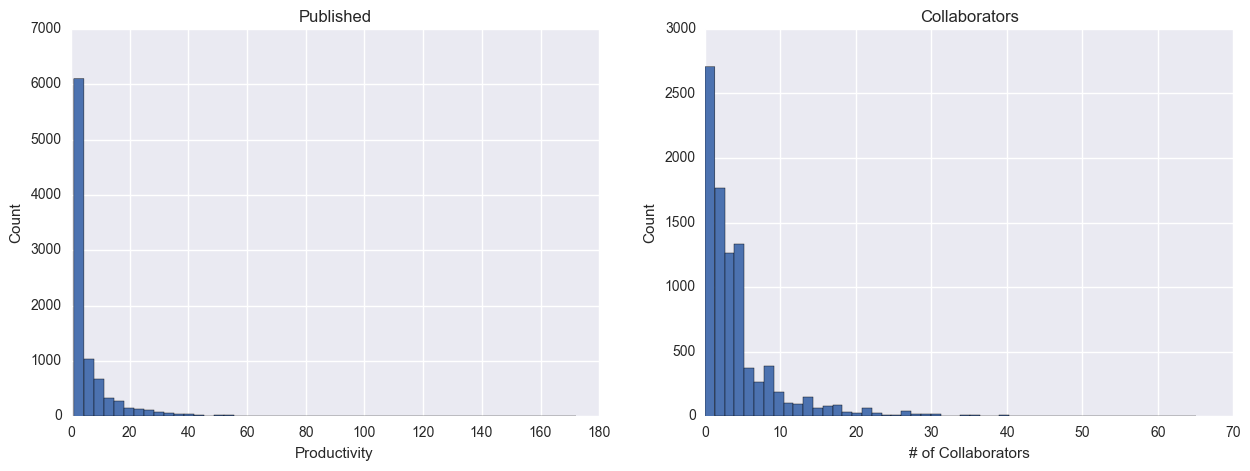

In [8]:
# let's visualize the distribution of productivity and number of collaborators
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(author_frame['published'], bins=50)
ax1.set_title("Published")
ax1.set_xlabel("Productivity")
ax1.set_ylabel("Count")
ax2.hist(author_frame['collaborators'], bins=50)
ax2.set_title("Collaborators")
ax2.set_xlabel("# of Collaborators")
ax2.set_ylabel("Count")
plt.show()

We see that most authors have less than 10 collaborators, and less then 10 in published, yet there are certain "rich clubs" with very many collaborators and high publishment.

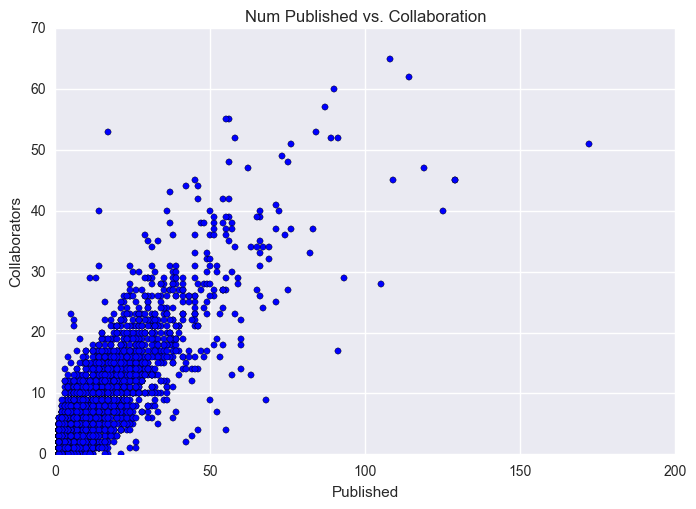

In [9]:
# let's visualize the relation between num papers published and collaborators. 
plt.scatter(x=author_frame["published"], y=author_frame["collaborators"])
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.title("Num Published vs. Collaboration")
plt.xlabel("Published")
plt.ylabel("Collaborators")
plt.show()

Clearly there's a correlation between number of papers published and number of collaborators, as you'd expect. If you have many collaborators, trivially, the number of papers you must published will go up. Let's examine the relation between number of collaborators and the other productivity metrics, the citation metrics. 

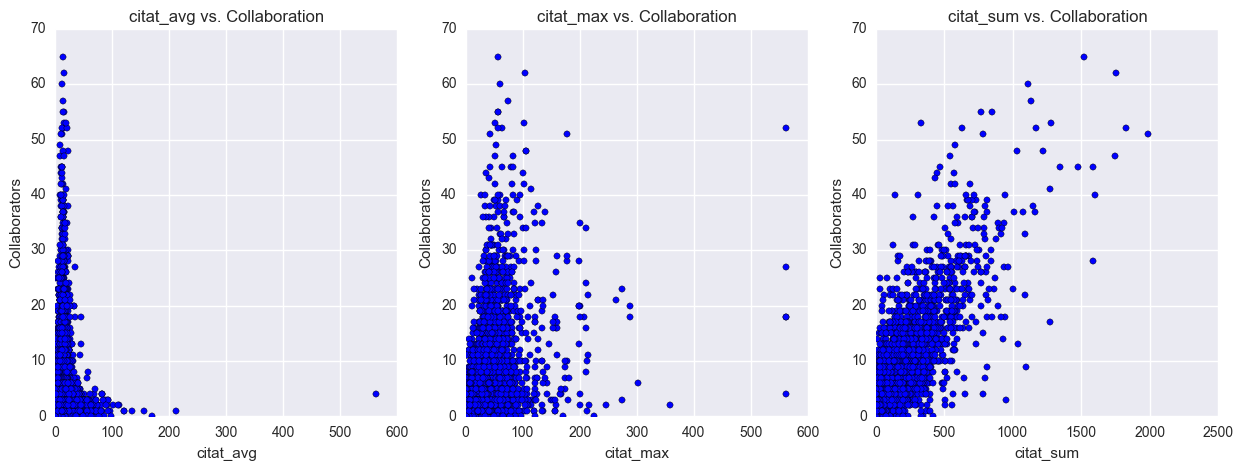

In [10]:
# let's visualize the relation between productivity and collaborators. 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(x=author_frame["citat_avg"], y=author_frame["collaborators"])
ax1.set_ylim(ymin=0)
ax1.set_xlim(xmin=0)
ax1.set_title("citat_avg vs. Collaboration")
ax1.set_xlabel("citat_avg")
ax1.set_ylabel("Collaborators")

ax2.scatter(x=author_frame["citat_max"], y=author_frame["collaborators"])
ax2.set_ylim(ymin=0)
ax2.set_xlim(xmin=0)
ax2.set_title("citat_max vs. Collaboration")
ax2.set_xlabel("citat_max")
ax2.set_ylabel("Collaborators")

ax3.scatter(x=author_frame["citat_sum"], y=author_frame["collaborators"])
ax3.set_ylim(ymin=0)
ax3.set_xlim(xmin=0)
ax3.set_title("citat_sum vs. Collaboration")
ax3.set_xlabel("citat_sum")
ax3.set_ylabel("Collaborators")

plt.show()

We see that citat_sum is correlating quite well with collaboration, but we already know that citat_sum is highly dependent on number of papers published, which in turn is increased by the number of collaborators, so this is no a significant result. We see an interesting pyramid structure for citat_max and to some extend citat_avg, suggesting that there might be a correlation when we group authors by some third measure, which could be centrality in the collaboration network. 

We already know that citat_max does correlate ~0.4 with degree centrality - which means that if you collaborate a lot, you're more likely to produce a highly cited paper. 

Now, we'll consider aspect pertinent to the connectedness of the graph.

In [11]:
# first let's count the number of isolated vertices. 
isolated_vertices = nx.isolates(G)
print("there are {} isolated nodes in the graph".format(len(isolated_vertices)))

# clustering coefficient 
average_clustering_coefficient = nx.average_clustering(G)
print("Average Clustering Coefficient {}".format(average_clustering_coefficient))

there are 824 isolated nodes in the graph
Average Clustering Coefficient 0.414939976733


Hence, the graph is not connected and there are 901 lone wolfs out there. On average 40% of any author's collaborators, have also collaborated. However, note that sometimes there a multiple authors collaborating on the same paper, so this number might just be a reflection of this fact. Let's look at connected components.

In [12]:
graphs = list(nx.connected_component_subgraphs(G))

print("number of connected components: {}".format(len(graphs)))
n_nodes_largest_c = max((map(lambda x : x.number_of_nodes(), graphs)))
print("larges connected component: {}".format(n_nodes_largest_c))
fraction = n_nodes_largest_c / float(G.number_of_nodes())
print("fraction of authors belonging to the largest connected component {}".format(fraction))
largest_component = sorted(graphs, key=len, reverse=True)[0]


number of connected components: 1234
larges connected component: 7237
fraction of authors belonging to the largest connected component 0.786288570187


Hence, there is a giant connected component comprising 78 percent of all authors. The following is a list of stats on this component.

In [13]:
avg_clustering_largest_c = nx.average_clustering(largest_component)
print("avg_clustering in largest connected c : {}".format(avg_clustering_largest_c))

avg_clustering in largest connected c : 0.470319248721


Hence, there's more clustering inside the largest connected component. Let's now consider the rich club coefficient.

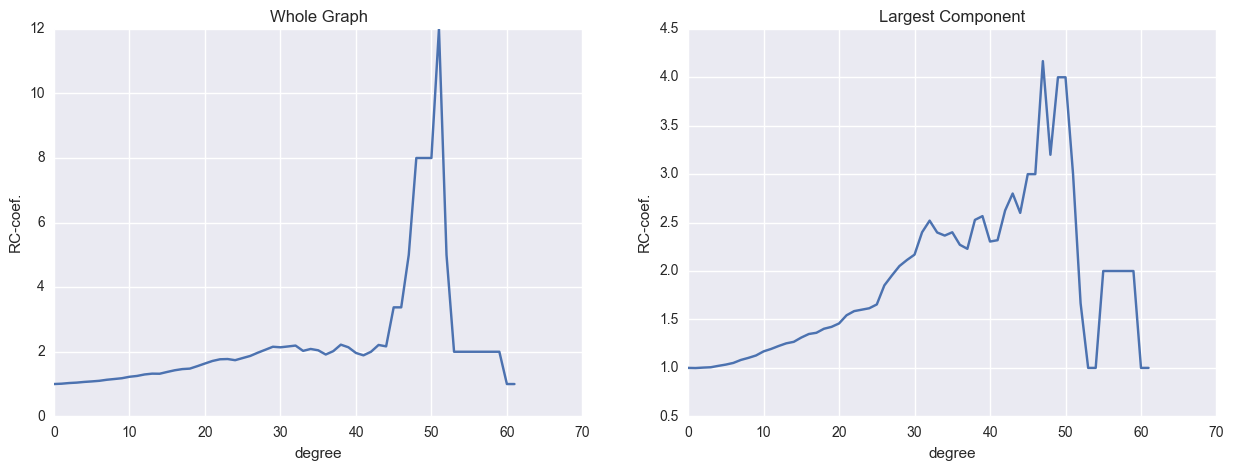

In [14]:
# back to main graph : RICH CLUB Coeeficient
rich_club_whole = nx.rich_club_coefficient(G)
rich_club_component = nx.rich_club_coefficient(largest_component)

data_whole = np.empty((2, len(rich_club_whole)))
data_component = np.empty((2, len(rich_club_component)))

for i, x in enumerate(rich_club_whole.keys()):
    data_whole[0][i] = x
    data_whole[1][i] = rich_club_whole[x]
    
for i, x in enumerate(rich_club_component.keys()):
    data_component[0][i] = x
    data_component[1][i] = rich_club_component[x]

    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(data_whole[0], data_whole[1])
ax1.set_title("Whole Graph")
ax1.set_xlabel("degree")
ax1.set_ylabel("RC-coef.")
ax2.plot(data_component[0], data_component[1])
ax2.set_title("Largest Component")
ax2.set_xlabel("degree")
ax2.set_ylabel("RC-coef.")
plt.show()

We see that there is indeed a rich club of degree >40 that are connected with one-another. It'd be interesting to investigate the various effects on the productivity metrics of being in close proximity to such a club. 

Let's see if our extreme authors (in terms of max vals of params) are present in the largest connected component.

In [15]:
x = filter(lambda x: x in largest_component.nodes(), [most_published, most_collaborative, most_cited_sum, most_cited_avg, most_cited_max])
if len(x) == 5:
    print("All extremes are in the largest connected component")

All extremes are in the largest connected component


Now we'll load all the centrality values for all the authors, to decide which one has the most ERDOS-like characteristics. 

In [20]:
centralities = {}
# get betweenness centralities from file
with open("Centralities/Betweenness_Centrality") as f: 
    for line in f:
        if "#" not in line:
            try:
                author, central = line.split(" ")
                centralities[author] = {}
                centralities[author]["betweenness"] = float(central.replace("\n",""))
            except:
                continue

with open("Centralities/Closeness_Centrality") as f:
    for line in f:
        if "#" not in line:
            try:
                author, central = line.split(" ")
                centralities[author]["closeness"] = float(central.replace("\n",""))
            except:
                continue

We know from top10.txt that author 1095 has the most papers published and is the most central in terms of betweenness, so we shall select them as our 'Erdős'. Let's investigate what kind of impact the length from 1095 has on our productivity metrics.

In [18]:
def get_neighbours_not_in_set(n, bad_set):
    neighbours = nx.all_neighbors(largest_component, n)
    return filter(lambda x: x not in bad_set, neighbours)

# recursive algo to get nodes that are exactly k steps away from a node_set
def get_nodes_k_away(bad_set, node_set, k):
    to_return = set()
    for x in node_set:
        to_return = to_return.union(get_neighbours_not_in_set(x, bad_set))
    if k==1:
        return to_return
    else:
        node_set = to_return
        bad_set = bad_set.union(node_set)
        return get_nodes_k_away(bad_set, node_set, k-1)

k_sets_from_1095 = map(lambda x: get_nodes_k_away(set([1095]), set([1095]), x), range(1, 50))

# remove empty sets
k_sets_from_1095_no_empty = filter(lambda x: len(x)>0, k_sets_from_1095)
print("length of k_sets_from_1095: {}".format(len(k_sets_from_1095)))
print("length of k_sets_from_1095_no_empty: {}".format(len(k_sets_from_1095_no_empty)))

length of k_sets_from_1095: 49
length of k_sets_from_1095_no_empty: 11


It follows that every node in the large connected component is reachable from 'Erdős' in at most 11 steps. Let's now consider the avg metrics for each k group. 

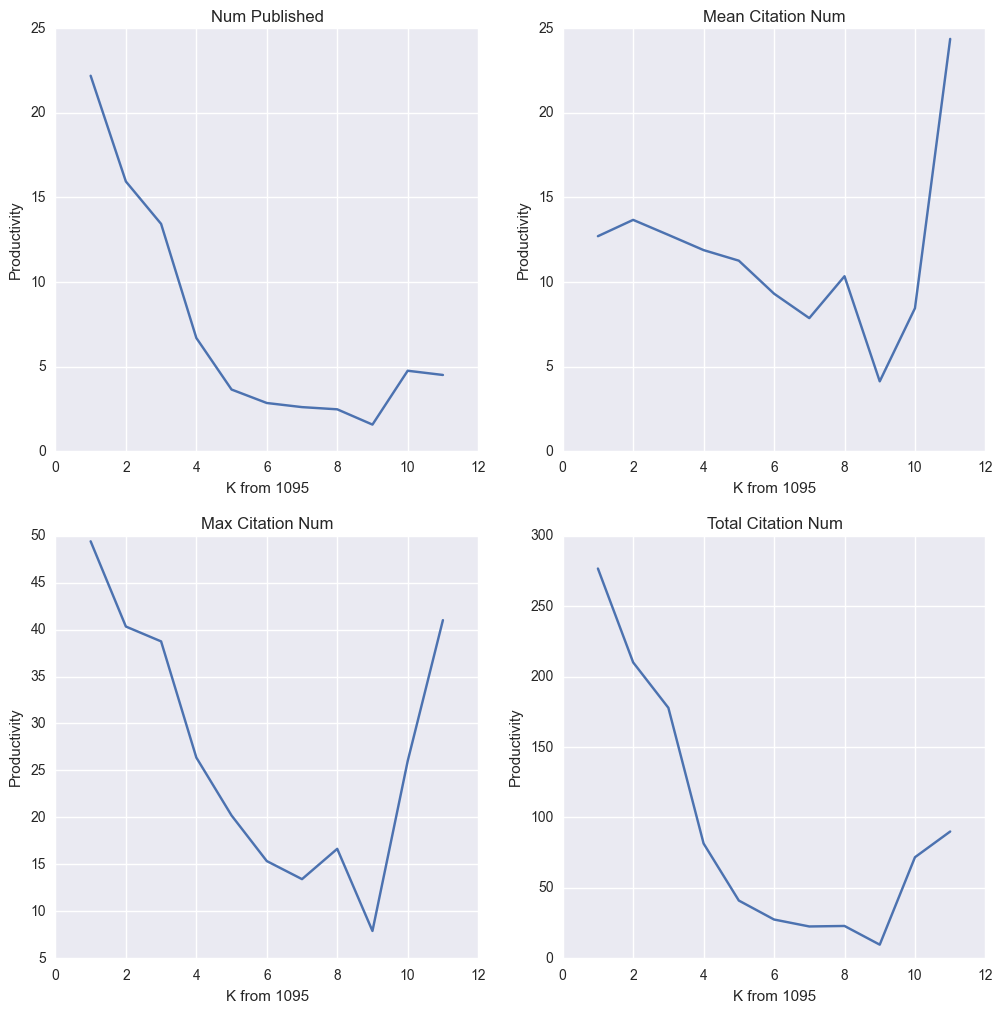

In [17]:
k_group_vals = np.empty((4, 11))

for k, nodes in enumerate(k_sets_from_1095_no_empty):
    k_group_vals[0][k] = sum(map(lambda x: author_published[x], nodes)) / float(len(nodes))
    k_group_vals[1][k] = sum(map(lambda x: author_citations[str(x)]['avg'], nodes)) / float(len(nodes))
    k_group_vals[2][k] = sum(map(lambda x: author_citations[str(x)]['max'], nodes)) / float(len(nodes))
    k_group_vals[3][k] = sum(map(lambda x: author_citations[str(x)]['sum'], nodes)) / float(len(nodes))
    
from matplotlib import gridspec

fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2,2)
ax0 = plt.subplot(gs[0])
ax0.plot(range(1, 12), k_group_vals[0])
ax0.set_title("Num Published")
ax0.set_xlabel("K from 1095")
ax0.set_ylabel("Productivity")
ax1 = plt.subplot(gs[1])
ax1.plot(range(1, 12), k_group_vals[1])
ax1.set_title("Mean Citation Num")
ax1.set_xlabel("K from 1095")
ax1.set_ylabel("Productivity")
ax2 = plt.subplot(gs[2])
ax2.plot(range(1, 12), k_group_vals[2])
ax2.set_title("Max Citation Num")
ax2.set_xlabel("K from 1095")
ax2.set_ylabel("Productivity")
ax3 = plt.subplot(gs[3])
ax3.plot(range(1, 12), k_group_vals[3])
ax3.set_title("Total Citation Num")
ax3.set_xlabel("K from 1095")
ax3.set_ylabel("Productivity")
plt.show()


Very interesting to note that the further away from author 'Erdős', the worse you perform as an author on every metric. This holds untill you make it 9 steps away, then suddently your performance starts to improve again. Let's take a closer look at this high performace group where k > 9.

In [19]:
print("the cardinality of these 3 sets:")
print(map(lambda x: len(k_sets_from_1095_no_empty[x]), range(11))[8:])


for i in range(8,11):
    print("====== FOR K={} =======".format(i))
    print("num_published")
    print(map(lambda x: author_published[x], k_sets_from_1095_no_empty[9]))
    print("citat_avg")
    print(map(lambda x: author_citations[str(x)]["avg"], k_sets_from_1095_no_empty[i]))
    print("citat_max")
    print(map(lambda x: author_citations[str(x)]["max"], k_sets_from_1095_no_empty[i]))
    print("citat_sum")
    print(map(lambda x: author_citations[str(x)]["sum"], k_sets_from_1095_no_empty[i]))

the cardinality of these 3 sets:
[23, 4, 2]
====== FOR K=8 =======
num_published
[9, 1, 1, 8]
citat_avg
[3.0, 1.0, 4.0, 16.3333333333, 13.5, 0.0, 0.0, 1.5, 0.0, 1.0, 3.0, 5.0, 0.0, 18.0, 2.5, 0.0, 3.0, 8.0, 1.0, 13.0, 0.0, 1.0, 0.0]
citat_max
[3, 1, 4, 49, 24, 0, 0, 3, 0, 1, 3, 6, 0, 36, 5, 0, 3, 20, 1, 22, 0, 1, 0]
citat_sum
[3, 1, 4, 49, 27, 0, 0, 3, 0, 1, 3, 10, 0, 36, 5, 0, 3, 24, 1, 52, 0, 1, 0]
====== FOR K=9 =======
num_published
[9, 1, 1, 8]
citat_avg
[16.6666666667, 0.0, 0.0, 17.125]
citat_max
[52, 0, 0, 52]
citat_sum
[150, 0, 0, 137]
====== FOR K=10 =======
num_published
[9, 1, 1, 8]
citat_avg
[30.0, 18.75]
citat_max
[30, 52]
citat_sum
[30, 150]


It looks like the sudden rise on the metrics can be explained by the fact that the sets where k>8 are much smaller than the avg size k-set, and hence are more sensitive to outliers. Overall, we can conclude, that the further away you are from 'Erdős', the more likely you are to perform poorly. We also note, that if you're less than 4 steps away from 'Erdős' you tend to do better on avg. compared to the mean over the whole graph for every metric. This is a quite a significant result! 

In [23]:
nodes_centrality_between_component = nx.betweenness_centrality(largest_component)
nodes_centrality_between_whole = nx.betweenness_centrality(G)

def get_sorted_centralities(centralities):
    lst = []
    for x in centralities:
        lst.append((x, centralities[x]))
    return sorted(lst, key=lambda x: x[1], reverse=True)
    
between_centralities_sorted_component = get_sorted_centralities(nodes_centrality_between_component)    
most_central = between_centralities_sorted_component[0][0]

print("most central in LCC in terms of betweenness ")
print("auhtor: {}, published: {}".format(most_central, author_published[most_central]))

between_centralities_sorted_whole = get_sorted_centralities(nodes_centrality_between_whole)
most_central = between_centralities_sorted_whole[0][0]
print("most central in whole graph in terms of betweenness ")
print("auhtor: {}, published: {}".format(most_central, author_published[most_central]))


most central in LCC in terms of betweenness 
auhtor: 1095, published: 172
most central in whole graph in terms of betweenness 
auhtor: 1095, published: 172


Interestingly, the most productive author is also the most central in terms of betweenness in the largest connected component. Let's see if this is a general trend by plotting author productivity against betweenneess centrality

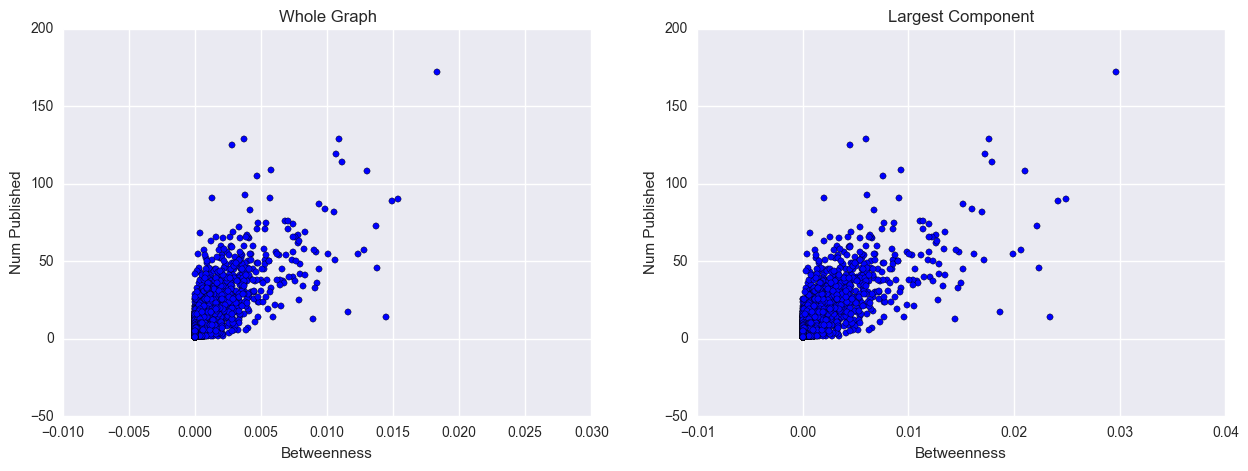

Correlation Coefficients
Whole Graph: 0.767210890086
Largest Connected Component: 0.764372825428


In [24]:
data_component = np.empty((2, len(nodes_centrality_between_component)))
data_whole = np.empty((2, len(nodes_centrality_between_whole)))
for i, x in enumerate(nodes_centrality_between_component.keys()):
    data_component[1][i] = author_published[x]
    data_component[0][i] = nodes_centrality_between_component[x]
    
for i, x in enumerate(nodes_centrality_between_whole.keys()):
    data_whole[1][i] = author_published[x]
    data_whole[0][i] = nodes_centrality_between_whole[x]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.scatter(data_whole[0], data_whole[1])
ax1.set_title("Whole Graph")
ax1.set_xlabel("Betweenness")
ax1.set_ylabel("Num Published")
ax2.scatter(data_component[0], data_component[1])
ax2.set_title("Largest Component")
ax2.set_xlabel("Betweenness")
ax2.set_ylabel("Num Published")
plt.show()


print("Correlation Coefficients")
print("Whole Graph: {}".format(np.corrcoef(data_whole)[0][1]))
print("Largest Connected Component: {}".format(np.corrcoef(data_component)[0][1]))

So there's a very strong correlation between betweenness and number of papers published. Yet, is this merely because the number of edges correlate with betweenness?

Let's review some more stats about the largest connected component:

In [25]:
avg_clustering_largest_c = nx.average_clustering(largest_component)
print("avg_clustering in largest connected c : {}".format(avg_clustering_largest_c))

avg_clustering in largest connected c : 0.470319248721


So inside this component, there's a higher clustering than on the graph as a whole. Let's now look at other centralitiy meassures. 

In [26]:
nodes_centrality_closeness = nx.closeness_centrality(largest_component)
close_centralities_sorted = get_sorted_centralities(nodes_centrality_closeness)
most_central = close_centralities_sorted[0][0]
print(author_published[most_central])
print(most_central)

90
1386


So the most central (closeness) node in the largest component is not 172, but 1386, though with less than 1095 papers published. 

In [27]:
nodes_centralitiy_eigen = nx.eigenvector_centrality(largest_component)
eigen_centralities_sorted = get_sorted_centralities(nodes_centralitiy_eigen)
most_central = eigen_centralities_sorted[0][0]
print(author_published[most_central])
print(most_central)

129
6414


In [28]:
# back to main graph : RICH CLUB Coeeficient
rich_club_whole = nx.rich_club_coefficient(G)
rich_club_component = nx.rich_club_coefficient(largest_component)

print("rich club coefficients\n")
print("whole graph: {}".format(rich_club_whole))
print("largest connected component: {}".format(rich_club_component))

rich club coefficients

whole graph: {0: 1.0, 1: 1.010406264781626, 2: 1.0282803998481589, 3: 1.0419001025802888, 4: 1.062384965610772, 5: 1.0804786485218207, 6: 1.0996376811594202, 7: 1.1352633300621524, 8: 1.1658555577185128, 9: 1.195976491862568, 10: 1.2447902195054181, 11: 1.2664765525982258, 12: 1.2971014492753623, 13: 1.334038950042337, 14: 1.3505355404089583, 15: 1.3960000000000001, 16: 1.4395759717314487, 17: 1.448218724109362, 18: 1.5024342745861732, 19: 1.6085946573751453, 20: 1.627296587926509, 21: 1.7459016393442623, 22: 1.7699619771863118, 23: 1.8714285714285714, 24: 1.8978494623655915, 25: 1.9210526315789473, 26: 2.0474452554744524, 27: 2.0755555555555554, 28: 2.1739130434782608, 29: 2.1273885350318475, 30: 2.006802721088435, 31: 2.046511627906977, 32: 2.0655737704918034, 33: 2.009009009009009, 34: 1.920792079207921, 35: 2.0454545454545454, 36: 1.9420289855072463, 37: 1.8771929824561404, 38: 2.0681818181818183, 39: 2.0263157894736845, 40: 1.558823529411765, 41: 1.64516129

Plot rich club coefficients to show to phenonema: 
If we can show that very highly connected nodes, tend to connect with other highly connected nodes, then there's a rich club. Showing that this club exists is the first step in identifying its members. 

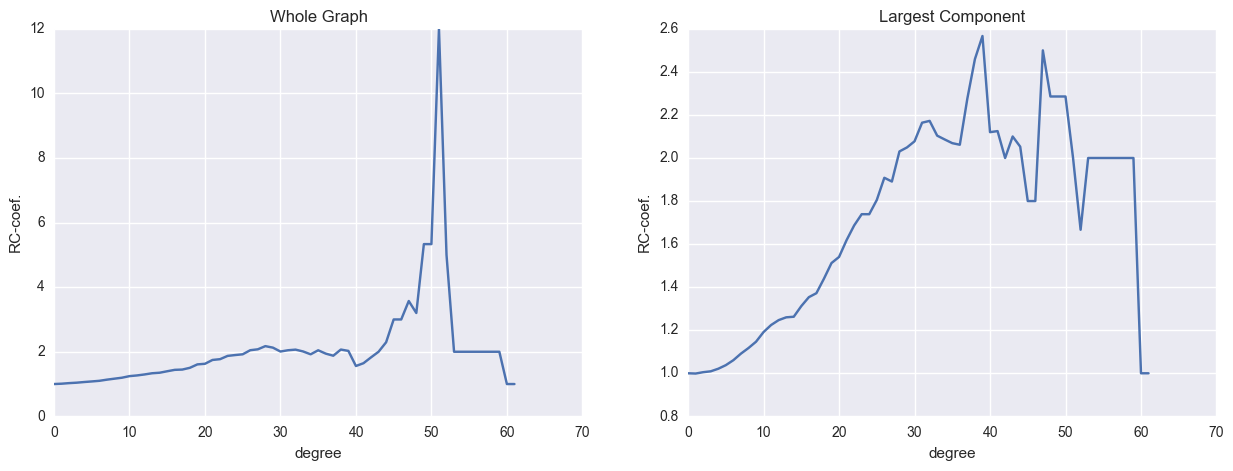

In [29]:
data_whole = np.empty((2, len(rich_club_whole)))
data_component = np.empty((2, len(rich_club_component)))

for i, x in enumerate(rich_club_whole.keys()):
    data_whole[0][i] = x
    data_whole[1][i] = rich_club_whole[x]
    
for i, x in enumerate(rich_club_component.keys()):
    data_component[0][i] = x
    data_component[1][i] = rich_club_component[x]

    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(data_whole[0], data_whole[1])
ax1.set_title("Whole Graph")
ax1.set_xlabel("degree")
ax1.set_ylabel("RC-coef.")
ax2.plot(data_component[0], data_component[1])
ax2.set_title("Largest Component")
ax2.set_xlabel("degree")
ax2.set_ylabel("RC-coef.")
plt.show()

Theere seems to be a rich club, of authors who have collaborated with more than 50 other authors. Hence, we might isolate these authors, and look at the effect of being close to them vs. far away from them. 